## Modelo del votante

Este modelo busca simular un mecanismo sobre la formación de consensos. Es importante mencionar que se basa principalmente en la idea de que cada votante no tiene un criterio propio, si no que tiende a copiar la postura de sus vecinos más cercanos, el cual es elegido aleatoriamente.

En esta versión simplificada, las opiniones son solo dos posibles opciones o estados de cada votante; denotadas con $\pm 1$. Es este punto el que vuelve tan similar al modelo de Ising-Glauber. Además, consideramos una red de $N$ votantes (es decir, dimensión 2) dispuestos en distribución de $N \times N = N^{2}$, por lo que los vecinos más cercanos son los que están a su izquierda y derecha, como arriba y abajo.

Este modelo obedece principios similares a los de la dinámica de Glauber, es decir, que debe satisfacer el principio de balance detallado. La probabilidad del sistema obedece a la ecuación maestra:

$$ \frac{dP (s)}{dt} = - \sum_{x} w_{x}(s) P(s) + \sum_{x} w_{x}(s^{x}) P(s^{x}) $$

En donde $s^{x}$ es el mismo estado que $s$ excepto de que el votante, en el punto $x$ cambió de opinión. 

Dados cambios de opinión vienen dados bajo la tasa de transición de:

$$ w_{x} (x) = \frac{1}{2} [1 - \frac{s(x)}{z} \sum_{y \in <x>}s(y)] $$

En donde la suma se hace alrededor de los vecinos más cercanos de $x$ y $z$ es el número de coordinación de la red. 

## Simulación

Respetando lo anterior presentado, la simulación consiste en tener una red de dimensiónes $N^{2}$. La cual para cada uno de los votantes se escoge un vecino cercano para mantener o cambiar su estado. Nótese que implícitamente se asume que cada votante tiene una equiprobabilidad de ser sorteado en la simulación. Finalmente se presentan gráficos de una comparativa de estado inicial y final, con la gráfica del consenso.

**INICIO**


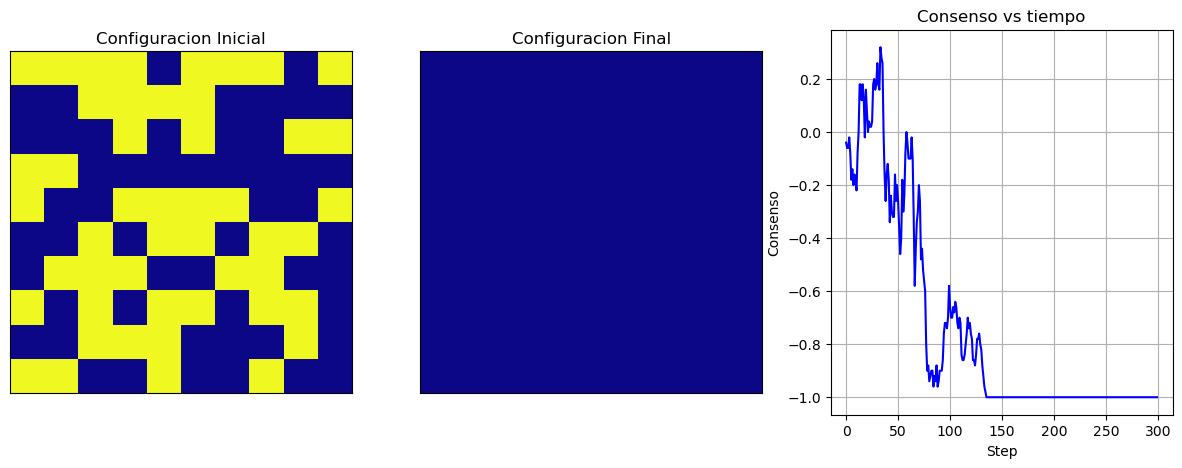

Tiempo ocupado (h:m:s:ns): 0:00:01.679444
**FIN**


In [4]:
# Modelo del votante, adaptacion código dinámica de Glauber

#===================================================================
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
#-------------------------------------------------------------------
print('**INICIO**')
print('==========')
# Inicio contador temporal del programa
tini = datetime.now()
#-------------------------------------------------------------------
# Condiciones iniciales
N=10
steps = 300


curr_state = np.random.choice(np.array([-1,1]),size=(N,N))
#-----------------------------------------------
# Configuracion Figura
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))

# Figura Estado Inicial
ax1.matshow(curr_state, cmap = plt.cm.plasma)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title("Configuracion Inicial")
#-----------------------------------------------
# Dinamica
M = np.zeros(steps)
for i in range(steps):
   M[i] = np.sum(curr_state)

   # Evaluacion por espin
   for n in range(N**2):
      # elige un espin en la posicion (i,j) aleatoriamente
      i, j = np.random.randint(N), np.random.randint(N)
      votante = curr_state[i,j]
      #vecinos
      #vecino = np.array([(i+1, j), (i-1, j), (i, j+1), (i, j-1)])
      vecino = np.array([curr_state[(i-1)%N, j], curr_state[(i+1)%N, j], curr_state[i, (j-1)%N], curr_state[i, (j+1)%N]])
      indice_vecino = np.random.choice(len(vecino))
      vecino_seleccionado = vecino[indice_vecino]
      
      #comparar vecino y reemplazar
      if votante != vecino_seleccionado:
          #votante = vecino_seleccionado
          votante = -1*curr_state[i, j]
      else:
          votante = curr_state[i, j]
     #actualizar estado de los votantes
      curr_state[i, j] = votante          
          

#-----------------------------------------------
# Figura Estado Final
ax2.matshow(curr_state, cmap = plt.cm.plasma)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Configuracion Final")
#-----------------------------------------------
# Figura Magnetizacion
ax3.plot(M/N**2,'-b')
ax3.set_xlabel("Step")
ax3.set_ylabel("Consenso")
ax3.set_title("Consenso vs tiempo")
ax3.grid(True)
#-----------------------
plt.show()
#===============================================================================================
# Fin contador temporal del programa
tfin = datetime.now()
dtie = tfin - tini
print('Tiempo ocupado (h:m:s:ns):', dtie)
#-----------------------------------------------
print('========')
print('**FIN**')